/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_68703/4079206031.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import Series, read_csv, datetime
/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_68703/4079206031.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


30377 14962


/Users/chantana/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Fut

                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                30377
Model:                         AR(50)   Log Likelihood                7159.627
Method:                          cmle   S.D. of innovations              0.191
Date:                Mon, 25 Apr 2022   AIC                             -3.307
Time:                        20:27:24   BIC                             -3.292
Sample:                             0   HQIC                            -3.302
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.005      1.988      0.047       0.000       0.018
L1.y           0.3361      0.006     58.482      0.000       0.325       0.347
L2.y           0.5394      0.006     88.968      0.0

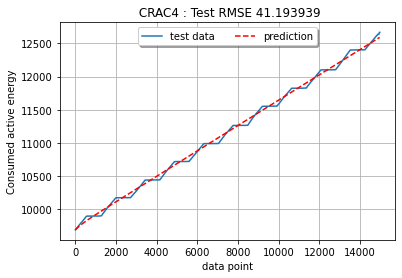

In [14]:
from pandas import Series, read_csv, datetime
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import numpy as np
import pandas as pd
import sys
import os

def time_parser(x):
    return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

 

series = pd.read_csv('../CRAC4/CRAC4.out.csv',index_col='Var1',parse_dates=True,date_parser=time_parser)



#series = Series.from_csv(csv_file, header=0)

ratio = 0.67


# split dataset
X = series.values
train_size = int(len(X) * ratio)
test_size = len(X) - train_size
print (train_size, test_size)

train, test = X[0:train_size], X[train_size:len(X)]
# train autoregression
model = AR(train )
model_fit = model.fit(cov_type="HC0")
print(model_fit.summary())
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
print('train ratio  %f' % ratio)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#for i in range(len(predictions)):
#	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
error_rt = sqrt(error)

print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % sqrt(error))
# plot results
# plot predictions vs expected
pyplot.grid("on")
pyplot.xlabel("data point")
pyplot.ylabel("Consumed active energy")
pyplot.title(" CRAC4 : Test RMSE %f"%(error_rt))
pyplot.plot(test,label="test data")
pyplot.plot(predictions, color='red',linestyle='--',label="prediction")
pyplot.legend(loc='upper center',  shadow=True, ncol=2)
pyplot.savefig('images/CRAC4-AR-predict2.png')
pyplot.show()


 







/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_68703/1680894297.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import Series, read_csv, datetime
/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_68703/1680894297.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


30409 14979


/Users/chantana/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Fut

Lag: 50
Coefficients: [ 1.15852469e-02  3.72419446e-01  5.52519877e-01  3.85924334e-01
 -1.90131098e-01 -6.53485395e-02 -4.56979128e-02  1.00159216e-01
  4.66026225e-02 -2.00920690e-02  7.92720805e-02 -8.20084430e-02
  1.33192012e-02 -8.23240969e-02 -2.08982981e-02 -1.83190106e-02
 -1.58817842e-02  8.06150555e-03 -2.93259605e-02  7.26237154e-02
 -4.01714232e-02 -1.25345551e-02 -2.54238222e-03  2.71029345e-02
 -1.75318879e-02  2.19080324e-02 -4.02166767e-02  6.16726913e-03
  4.81887722e-02 -8.40613624e-02  8.13970337e-03  3.02679767e-02
 -4.45915784e-02  4.05205930e-02 -9.29738573e-03  1.90813924e-03
  2.25221904e-02 -3.63266533e-02  2.65525710e-02  8.27997868e-04
 -2.14115009e-03 -2.01335979e-02 -1.61538892e-03  2.10392789e-02
 -1.00105973e-02 -8.24307045e-03  3.05548247e-02 -1.97849733e-02
 -4.13982420e-04  4.62455862e-03 -1.58329858e-03]
train ratio  0.670000
Test MSE: 62090.903
Test RMSE: 249.180


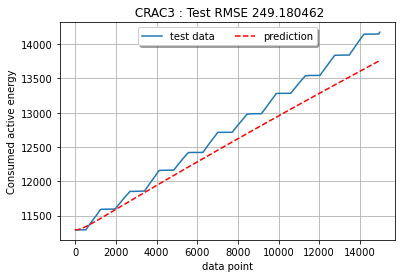

In [2]:
from pandas import Series, read_csv, datetime
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import numpy as np
import pandas as pd
import sys
import os

def time_parser(x):
    return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

 

series = pd.read_csv('../CRAC3/CRAC3.out.csv',index_col='Var1',parse_dates=True,date_parser=time_parser)



#series = Series.from_csv(csv_file, header=0)

ratio = 0.67


# split dataset
X = series.values
train_size = int(len(X) * ratio)
test_size = len(X) - train_size
print (train_size, test_size)

train, test = X[0:train_size], X[train_size:len(X)]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
print('train ratio  %f' % ratio)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#for i in range(len(predictions)):
#	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
error_rt = sqrt(error)

print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % sqrt(error))
# plot results
# plot predictions vs expected
pyplot.grid("on")
pyplot.xlabel("data point")
pyplot.ylabel("Consumed active energy")
pyplot.title(" CRAC3 : Test RMSE %f"%(error_rt))
pyplot.plot(test,label="test data")
pyplot.plot(predictions, color='red',linestyle='--',label="prediction")
pyplot.legend(loc='upper center',  shadow=True, ncol=2)
pyplot.savefig('images/CRAC3-AR-predict2.png')
pyplot.show()








/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_68703/3563808285.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import Series, read_csv, datetime
/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_68703/3563808285.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


30539 15043


/Users/chantana/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Fut

Lag: 50
Coefficients: [ 1.09703579e+00  6.41521471e-02  4.97326458e-02  3.11108414e-02
  1.76645911e-02  9.65018030e-03  8.30817600e-03  6.18332123e-03
  4.88291768e-01  2.79570997e-02 -1.66851802e-02 -1.16161637e-02
 -6.47253790e-03 -3.98285913e-03 -4.91645908e-03 -1.30041357e-03
  5.09412819e-02  3.06123987e-01 -3.68691090e-02 -2.08624989e-02
 -1.26860060e-02 -7.82631342e-03 -6.70383419e-03 -9.52584500e-03
 -1.00605519e-02  2.22549549e-01 -4.29992570e-02 -1.37422400e-02
 -8.98823290e-03 -4.59951697e-03 -3.36981258e-04 -2.91594852e-04
  7.69798981e-03  2.37392245e-03 -3.17896711e-02  1.87901056e-03
 -1.86322443e-03 -1.26230542e-03 -1.47491910e-03  4.48989249e-04
  5.56271777e-03 -4.66444503e-02  4.20144426e-02  7.43948300e-03
  6.27541910e-03  4.13107255e-03  2.94500616e-03  2.95026810e-03
  4.24309416e-03 -4.80433954e-02 -1.90887826e-02]
train ratio  0.670000
Test MSE: 46.347
Test RMSE: 6.808


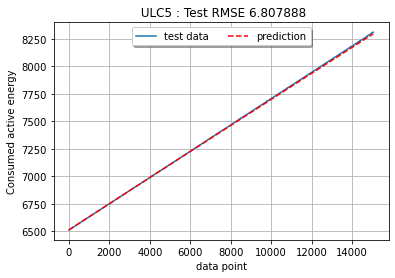

In [3]:
from pandas import Series, read_csv, datetime
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import numpy as np
import pandas as pd
import sys
import os

def time_parser(x):
    return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

 

series = pd.read_csv('../ULC5/ULC5.out.csv',index_col='Var1',parse_dates=True,date_parser=time_parser)



#series = Series.from_csv(csv_file, header=0)

ratio = 0.67


# split dataset
X = series.values
train_size = int(len(X) * ratio)
test_size = len(X) - train_size
print (train_size, test_size)

train, test = X[0:train_size], X[train_size:len(X)]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
print('train ratio  %f' % ratio)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#for i in range(len(predictions)):
#	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
error_rt = sqrt(error)

print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % sqrt(error))
# plot results
# plot predictions vs expected
pyplot.grid("on")
pyplot.xlabel("data point")
pyplot.ylabel("Consumed active energy")
pyplot.title(" ULC5 : Test RMSE %f"%(error_rt))
pyplot.plot(test,label="test data")
pyplot.plot(predictions, color='red',linestyle='--',label="prediction")
pyplot.legend(loc='upper center',  shadow=True, ncol=2)
pyplot.savefig('images/ULC5-AR-predict2.png')
pyplot.show()








/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_68703/1028479206.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import Series, read_csv, datetime
/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_68703/1028479206.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


30699 15121


/Users/chantana/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Fut

Lag: 50
Coefficients: [ 1.10301564e+00  4.67630729e-02  3.59785549e-02  1.64039449e-02
  2.25144637e-03 -6.01937365e-03 -4.15637240e-03 -1.63309023e-02
  4.54191185e-01  1.10574318e-01 -2.23129509e-02 -1.41817697e-02
 -4.05285513e-03  4.09888812e-03  3.81969949e-03  1.13184970e-02
  9.69935711e-03  2.42246448e-01 -3.04229255e-02 -4.16366991e-03
 -3.02000043e-04 -1.69798156e-03 -2.06050040e-03 -5.91945719e-03
 -7.57822188e-04  3.65884537e-01 -5.05378905e-02 -1.75818753e-02
 -8.16743044e-03  5.56300818e-04  5.89528493e-03  5.71220337e-03
  2.87061742e-03 -2.77668974e-02 -1.01985492e-02  9.35941235e-03
  6.72080040e-03  4.03407674e-03  8.64649206e-04 -3.02391230e-04
 -9.55424997e-04 -1.22311265e-02  1.57291017e-02  1.35123154e-02
  2.52012943e-04 -3.25718708e-03 -3.53662333e-03 -2.34576610e-03
  1.31907629e-03 -7.55172776e-03 -1.13241597e-01]
train ratio  0.670000
Test MSE: 53.233
Test RMSE: 7.296


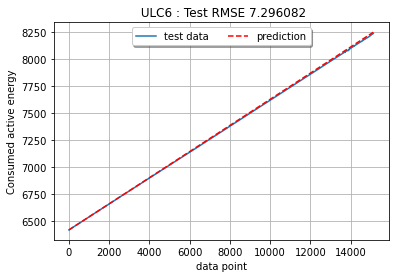

In [4]:
from pandas import Series, read_csv, datetime
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import numpy as np
import pandas as pd
import sys
import os

def time_parser(x):
    return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

 

series = pd.read_csv('../ULC6/ULC6.out.csv',index_col='Var1',parse_dates=True,date_parser=time_parser)



#series = Series.from_csv(csv_file, header=0)

ratio = 0.67


# split dataset
X = series.values
train_size = int(len(X) * ratio)
test_size = len(X) - train_size
print (train_size, test_size)

train, test = X[0:train_size], X[train_size:len(X)]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
print('train ratio  %f' % ratio)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#for i in range(len(predictions)):
#	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
error_rt = sqrt(error)

print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % error_rt)
# plot results
# plot predictions vs expected
pyplot.grid("on")
pyplot.xlabel("data point")
pyplot.ylabel("Consumed active energy")
pyplot.title(" ULC6 : Test RMSE %f"%(error_rt))
pyplot.plot(test,label="test data")
pyplot.plot(predictions, color='red',linestyle='--',label="prediction")
pyplot.legend(loc='upper center',  shadow=True, ncol=2)
pyplot.savefig('images/ULC6-AR-predict2.png')
pyplot.show()






